In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r1-good.csv')
dfm = pd.read_csv('wat-r1-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1
4,86,4,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,9,26,2,6,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0xeddc0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7,0
1,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7,0
2,79,0,2,0xeddc0,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7,0
3,80,0,2,0xeddc0,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7,0
4,81,0,2,0xeddc0,3,2,1,4,16,18,2,1,1,70,1,9,32,3,7,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1
4,86,4,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,9,26,2,6,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
50112,7,2,0,0xeddc0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7,0
50113,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7,0
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
50114,79,0,2,0xeddc0,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7,0
50115,80,0,2,0xeddc0,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7,0
50116,81,0,2,0xeddc0,3,2,1,4,16,18,2,1,1,70,1,9,32,3,7,0
50117,82,0,2,0xeddc0,3,3,1,4,16,18,2,1,1,70,1,8,32,2,7,0
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1


In [12]:
df.to_csv('wat-r1-pkt.csv',index=False)

In [18]:
df = pd.read_csv("wat-r1-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,2,0,0xeddc0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7,0
1,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7,0
2,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
3,79,0,2,0xeddc0,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7,0
4,80,0,2,0xeddc0,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,3251376,2,4,0x1152c0,4,1,1,2,8,0,0,27,11,3251361,10026,22,26,5,6,1
121949,3251383,2,4,0x1152c0,4,2,1,2,8,0,0,27,11,3251361,10026,17,26,4,6,1
121950,3251390,2,4,0x1152c0,4,3,1,2,8,0,0,27,11,3251361,10026,11,26,3,6,1
121951,3251397,2,4,0x1152c0,4,4,2,2,8,0,0,27,11,3251361,10026,4,26,2,6,1


In [19]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.074014,0.159709,0.020008,0.011741,-0.018427,-0.051869,-0.066649,-0.087441,-0.114769,0.074026,0.073298,1.000000,0.824879,-0.051102,-0.122039,-0.150331,-0.200696,0.389627
outport,0.074014,1.000000,-0.171123,-0.202175,-0.000848,0.001332,0.322062,0.353200,-0.108217,-0.262539,-0.220954,0.019220,0.074018,-0.034299,0.046621,-0.022611,-0.122149,-0.100077,0.217514
inport,0.159709,-0.171123,1.000000,0.008029,-0.015218,0.023901,-0.413279,-0.519149,-0.467374,-0.252404,0.464434,0.368545,0.159704,-0.004617,0.077218,0.017822,-0.102972,-0.205408,0.327446
packet_type,0.020008,-0.202175,0.008029,1.000000,0.260566,-0.409241,-0.233211,-0.266009,0.109956,0.032884,0.013865,-0.087889,0.020010,0.035319,-0.003181,-0.052721,0.075662,0.019886,-0.010211
flit_id,0.011741,-0.000848,-0.015218,0.260566,1.000000,0.063704,0.155672,0.117453,0.004326,0.001608,-0.049707,-0.022620,0.011737,0.009440,-0.037747,0.014686,-0.063680,0.012548,0.006547
flit_type,-0.018427,0.001332,0.023901,-0.409241,0.063704,1.000000,-0.244495,-0.184470,-0.006794,-0.002526,0.078068,0.035527,-0.018433,-0.014827,-0.031151,0.068672,-0.064075,0.036037,-0.010283
vnet,-0.051869,0.322062,-0.413279,-0.233211,0.155672,-0.244495,1.000000,0.968482,0.610851,0.366667,-0.850456,-0.463923,-0.051863,-0.037561,-0.134206,-0.000791,-0.010028,0.060417,-0.051914
vc,-0.066649,0.353200,-0.519149,-0.266009,0.117453,-0.184470,0.968482,1.000000,0.589550,0.309896,-0.840429,-0.466073,-0.066643,-0.038891,-0.139564,-0.020444,-0.006219,0.084976,-0.078345
src_ni,-0.087441,-0.108217,-0.467374,0.109956,0.004326,-0.006794,0.610851,0.589550,1.000000,0.655230,-0.766488,-0.659945,-0.087437,-0.034328,-0.189063,0.022979,0.096622,0.151141,-0.119761
src_router,-0.114769,-0.262539,-0.252404,0.032884,0.001608,-0.002526,0.366667,0.309896,0.655230,1.000000,-0.424247,-0.269302,-0.114769,0.007587,-0.028222,0.222718,0.080277,0.077052,-0.246512


In [20]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni',"pkt_chuck"])

In [21]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_count,pkt_max
0,2,0,0,0,3,2,8,23,7,3,7,7
1,2,4,0,0,3,2,8,23,7,3,6,7
2,2,4,0,0,3,2,8,23,7,3,6,6
3,0,2,3,0,0,4,16,1,1,70,5,7
4,0,2,3,1,1,4,16,1,1,70,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
121948,2,4,4,1,1,2,8,27,11,3251361,5,6
121949,2,4,4,2,1,2,8,27,11,3251361,4,6
121950,2,4,4,3,1,2,8,27,11,3251361,3,6
121951,2,4,4,4,2,2,8,27,11,3251361,2,6


In [22]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.200000,0.200000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.166667,0.200000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.166667,0.166667
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.032258,0.066667,0.000021,0.133333,0.200000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.032258,0.066667,0.000021,0.100000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
121948,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.133333,0.166667
121949,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.100000,0.166667
121950,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.066667,0.166667
121951,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.870968,0.733333,1.000000,0.033333,0.166667


In [23]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,target
0,1.000000,-0.171123,-0.202175,-0.000848,0.001332,0.322062,0.353200,-0.220954,0.019220,0.074018,-0.122149,-0.100077,0.217514
1,-0.171123,1.000000,0.008029,-0.015218,0.023901,-0.413279,-0.519149,0.464434,0.368545,0.159704,-0.102972,-0.205408,0.327446
2,-0.202175,0.008029,1.000000,0.260566,-0.409241,-0.233211,-0.266009,0.013865,-0.087889,0.020010,0.075662,0.019886,-0.010211
3,-0.000848,-0.015218,0.260566,1.000000,0.063704,0.155672,0.117453,-0.049707,-0.022620,0.011737,-0.063680,0.012548,0.006547
4,0.001332,0.023901,-0.409241,0.063704,1.000000,-0.244495,-0.184470,0.078068,0.035527,-0.018433,-0.064075,0.036037,-0.010283
5,0.322062,-0.413279,-0.233211,0.155672,-0.244495,1.000000,0.968482,-0.850456,-0.463923,-0.051863,-0.010028,0.060417,-0.051914
6,0.353200,-0.519149,-0.266009,0.117453,-0.184470,0.968482,1.000000,-0.840429,-0.466073,-0.066643,-0.006219,0.084976,-0.078345
7,-0.220954,0.464434,0.013865,-0.049707,0.078068,-0.850456,-0.840429,1.000000,0.784992,0.074020,-0.055328,-0.119212,0.075178
8,0.019220,0.368545,-0.087889,-0.022620,0.035527,-0.463923,-0.466073,0.784992,1.000000,0.073294,-0.138368,-0.153265,0.049722
9,0.074018,0.159704,0.020010,0.011737,-0.018433,-0.051863,-0.066643,0.074020,0.073294,1.000000,-0.150330,-0.200695,0.389627


In [24]:
train_Y = df['target']

In [25]:
train_Y

0         0
1         0
2         1
3         0
4         0
         ..
121948    1
121949    1
121950    1
121951    1
121952    1
Name: target, Length: 121953, dtype: int64

In [26]:
pca = PCA(0.95)

In [27]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.33808476, -0.08375186,  0.8553049 , ..., -0.3200531 ,
        -0.22605138, -0.09355252],
       [-0.70498965, -0.41412944,  0.42782617, ..., -0.49779837,
         0.03142848, -0.02653639],
       [-0.70623733, -0.42033367,  0.42513827, ..., -0.49159342,
         0.02618802, -0.05293484],
       ...,
       [-0.80032206, -0.47218327, -0.558706  , ...,  0.28534262,
        -0.2467772 ,  0.24549171],
       [-0.81058129, -0.46528332, -0.72462371, ...,  0.31330373,
        -0.24790086,  0.22526687],
       [-0.82474207, -0.75586051,  0.26984058, ...,  0.24936743,
        -0.50914756,  0.24196385]])

In [29]:
pca.explained_variance_ratio_

array([0.40969847, 0.1218744 , 0.11252958, 0.09786627, 0.08098562,
       0.0609875 , 0.05241268, 0.03916447])

In [30]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

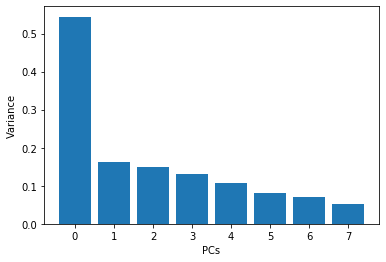

In [31]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [32]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7
0,-0.338085,-0.083752,0.855305,0.588182,-0.285901,-0.320053,-0.226051,-0.093553
1,-0.704990,-0.414129,0.427826,0.037109,-0.677126,-0.497798,0.031428,-0.026536
2,-0.706237,-0.420334,0.425138,0.034269,-0.676803,-0.491593,0.026188,-0.052935
3,0.758082,0.342616,0.140314,-0.792995,-0.057519,-0.431156,-0.140606,-0.137149
4,0.747823,0.349516,-0.025604,-0.501394,-0.290138,-0.403195,-0.141730,-0.157374
...,...,...,...,...,...,...,...,...
121948,-0.831447,-0.520715,-0.140695,-0.284691,0.170880,0.296268,-0.238187,0.268929
121949,-0.815884,-0.496449,-0.349700,-0.162261,0.181257,0.290805,-0.242482,0.257211
121950,-0.800322,-0.472183,-0.558706,-0.039832,0.191634,0.285343,-0.246777,0.245492
121951,-0.810581,-0.465283,-0.724624,0.251769,-0.040985,0.313304,-0.247901,0.225267


In [33]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,target
0,-0.338085,-0.083752,0.855305,0.588182,-0.285901,-0.320053,-0.226051,-0.093553,0
1,-0.704990,-0.414129,0.427826,0.037109,-0.677126,-0.497798,0.031428,-0.026536,0
2,-0.706237,-0.420334,0.425138,0.034269,-0.676803,-0.491593,0.026188,-0.052935,1
3,0.758082,0.342616,0.140314,-0.792995,-0.057519,-0.431156,-0.140606,-0.137149,0
4,0.747823,0.349516,-0.025604,-0.501394,-0.290138,-0.403195,-0.141730,-0.157374,0
...,...,...,...,...,...,...,...,...,...
121948,-0.831447,-0.520715,-0.140695,-0.284691,0.170880,0.296268,-0.238187,0.268929,1
121949,-0.815884,-0.496449,-0.349700,-0.162261,0.181257,0.290805,-0.242482,0.257211,1
121950,-0.800322,-0.472183,-0.558706,-0.039832,0.191634,0.285343,-0.246777,0.245492,1
121951,-0.810581,-0.465283,-0.724624,0.251769,-0.040985,0.313304,-0.247901,0.225267,1


In [34]:
final_df.corr()

,0,1,2,3,4,5,6,7,target
0,1.000000e+00,-2.090796e-16,5.257693e-16,4.369670e-16,-1.631220e-16,8.764072e-16,-3.486812e-17,-1.904414e-17,-0.112924
1,-2.090796e-16,1.000000e+00,2.535683e-15,2.575443e-15,2.328658e-15,7.805834e-16,5.894512e-15,3.091808e-16,-0.406678
2,5.257693e-16,2.535683e-15,1.000000e+00,1.258670e-15,1.648443e-15,3.008287e-16,-1.425701e-15,-2.270314e-16,-0.187888
3,4.369670e-16,2.575443e-15,1.258670e-15,1.000000e+00,-6.830344e-16,-3.457522e-16,-5.106944e-15,2.445803e-16,-0.172579
4,-1.631220e-16,2.328658e-15,1.648443e-15,-6.830344e-16,1.000000e+00,9.582739e-15,-4.827371e-15,5.403054e-16,-0.058847
5,8.764072e-16,7.805834e-16,3.008287e-16,-3.457522e-16,9.582739e-15,1.000000e+00,-4.125927e-15,-1.761096e-17,0.319893
6,-3.486812e-17,5.894512e-15,-1.425701e-15,-5.106944e-15,-4.827371e-15,-4.125927e-15,1.000000e+00,-1.462053e-15,0.045988
7,-1.904414e-17,3.091808e-16,-2.270314e-16,2.445803e-16,5.403054e-16,-1.761096e-17,-1.462053e-15,1.000000e+00,-0.210696
target,-1.129240e-01,-4.066778e-01,-1.878880e-01,-1.725786e-01,-5.884703e-02,3.198928e-01,4.598829e-02,-2.106962e-01,1.000000


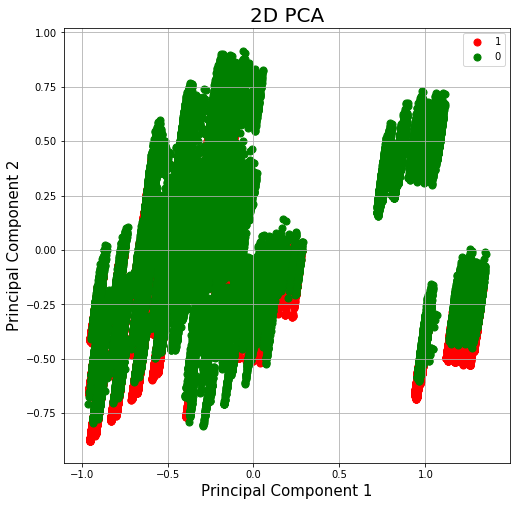

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [36]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,2,0,0,0,3,2,8,1,1,23,7,3,1,31,32,7,7,0
1,2,4,0,0,3,2,8,0,0,23,7,3,0,29,32,6,7,0
2,2,4,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
3,0,2,3,0,0,4,16,18,2,1,1,70,1,11,32,5,7,0
4,0,2,3,1,1,4,16,18,2,1,1,70,1,10,32,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,2,4,4,1,1,2,8,0,0,27,11,3251361,10026,22,26,5,6,1
121949,2,4,4,2,1,2,8,0,0,27,11,3251361,10026,17,26,4,6,1
121950,2,4,4,3,1,2,8,0,0,27,11,3251361,10026,11,26,3,6,1
121951,2,4,4,4,2,2,8,0,0,27,11,3251361,10026,4,26,2,6,1


In [37]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [38]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [39]:
seed = 7
np.random.seed(seed)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [41]:
model = Sequential()

In [42]:
n_cols = train_X.shape[1]
n_cols

12

In [43]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [45]:
model.fit(x_train, y_train, epochs=30, validation_split=0.4)

Train on 49756 samples, validate on 33172 samples
Epoch 1/30
49756/49756 [==============================] - 5s 102us/step - loss: 0.2174 - accuracy: 0.6446 - val_loss: 0.1820 - val_accuracy: 0.7790
Epoch 2/30
49756/49756 [==============================] - 4s 88us/step - loss: 0.1525 - accuracy: 0.7967 - val_loss: 0.1380 - val_accuracy: 0.8031
Epoch 3/30
49756/49756 [==============================] - 5s 103us/step - loss: 0.1313 - accuracy: 0.8114 - val_loss: 0.1294 - val_accuracy: 0.8128
Epoch 4/30
49756/49756 [==============================] - 6s 116us/step - loss: 0.1237 - accuracy: 0.8210 - val_loss: 0.1223 - val_accuracy: 0.8218
Epoch 5/30
49756/49756 [==============================] - 4s 89us/step - loss: 0.1182 - accuracy: 0.8304 - val_loss: 0.1175 - val_accuracy: 0.8304
Epoch 6/30
49756/49756 [==============================] - 5s 92us/step - loss: 0.1143 - accuracy: 0.8383 - val_loss: 0.1146 - val_accuracy: 0.8342
Epoch 7/30
49756/49756 [==============================] - 6s 117u

In [46]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [47]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.11%


In [48]:
from keras.layers import BatchNormalization
model = Sequential()
n_cols = train_X.shape[1]
n_cols
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(x_train, y_train, epochs=30, validation_split=0.4)

Train on 49756 samples, validate on 33172 samples
Epoch 1/30
49756/49756 [==============================] - 11s 225us/step - loss: 0.1694 - accuracy: 0.7781 - val_loss: 0.1385 - val_accuracy: 0.8295
Epoch 2/30
49756/49756 [==============================] - 8s 163us/step - loss: 0.1328 - accuracy: 0.8314 - val_loss: 0.1222 - val_accuracy: 0.8426
Epoch 3/30
49756/49756 [==============================] - 8s 161us/step - loss: 0.1224 - accuracy: 0.8390 - val_loss: 0.1138 - val_accuracy: 0.8507
Epoch 4/30
49756/49756 [==============================] - 8s 163us/step - loss: 0.1161 - accuracy: 0.8459 - val_loss: 0.1086 - val_accuracy: 0.8538
Epoch 5/30
49756/49756 [==============================] - 8s 157us/step - loss: 0.1121 - accuracy: 0.8488 - val_loss: 0.1035 - val_accuracy: 0.8597
Epoch 6/30
49756/49756 [==============================] - 8s 168us/step - loss: 0.1080 - accuracy: 0.8524 - val_loss: 0.1003 - val_accuracy: 0.8622
Epoch 7/30
49756/49756 [==============================] - 8s 

In [50]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.11%


In [49]:
df = pd.read_csv("wat-r1-pkt.csv")
df
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [51]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000090,0.200000,0.200000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000000,0.166667,0.200000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.000000,0.166667,0.166667
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.032258,0.066667,0.000021,0.000090,0.133333,0.200000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.032258,0.066667,0.000021,0.000090,0.100000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121948,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.904629,0.133333,0.166667
121949,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.904629,0.100000,0.166667
121950,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.870968,0.733333,1.000000,0.904629,0.066667,0.166667
121951,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.870968,0.733333,1.000000,0.904629,0.033333,0.166667


In [52]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [ ]:
from keras.layers import BatchNormalization
from keras.optimizers import SGD

In [55]:
model = Sequential()

n_cols = train_X.shape[1]
n_cols

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)
#early_stopping_monitor = EarlyStopping(patience=20)

model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, validation_split=0.4)

Train on 49756 samples, validate on 33172 samples
Epoch 1/30
49756/49756 [==============================] - 10s 203us/step - loss: 0.0356 - accuracy: 0.9521 - val_loss: 0.0132 - val_accuracy: 0.9829
Epoch 2/30
49756/49756 [==============================] - 8s 154us/step - loss: 0.0162 - accuracy: 0.9785 - val_loss: 0.0170 - val_accuracy: 0.9772
Epoch 3/30
49756/49756 [==============================] - 10s 193us/step - loss: 0.0143 - accuracy: 0.9810 - val_loss: 0.0121 - val_accuracy: 0.9825
Epoch 4/30
49756/49756 [==============================] - 9s 181us/step - loss: 0.0133 - accuracy: 0.9821 - val_loss: 0.0093 - val_accuracy: 0.9871
Epoch 5/30
49756/49756 [==============================] - 10s 204us/step - loss: 0.0128 - accuracy: 0.9827 - val_loss: 0.0119 - val_accuracy: 0.9839
Epoch 6/30
49756/49756 [==============================] - 9s 183us/step - loss: 0.0123 - accuracy: 0.9835 - val_loss: 0.0131 - val_accuracy: 0.9813
Epoch 7/30
49756/49756 [==============================] - 1

In [59]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [60]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.98%


In [83]:
dff = pd.read_csv('wat-r1-pkt.csv',nrows=500)

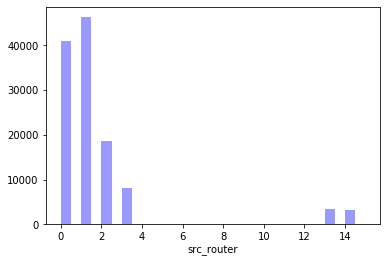

In [84]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

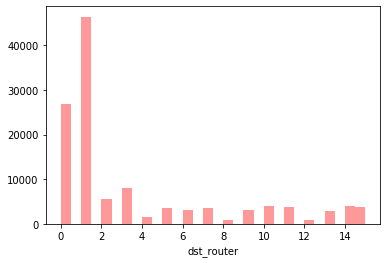

In [85]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

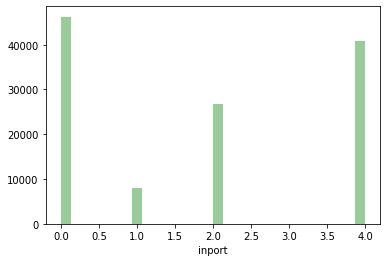

In [86]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

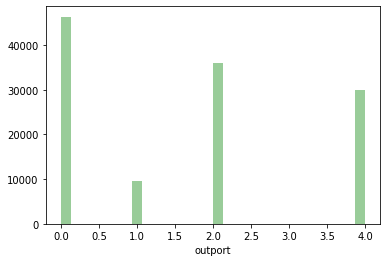

In [87]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

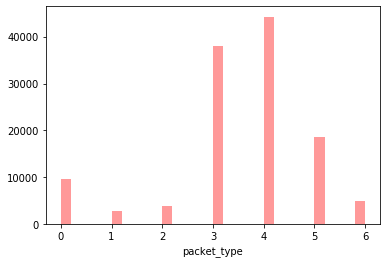

In [88]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')